In [3]:
!pip install opencv-python numpy


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/39.5 MB 812.7 kB/s eta 0:00:49
   ---------------------------------------- 0.1/39.5 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.2/39.5 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.2/39.5 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.3/39.5 MB 1.3 MB/s eta 0:00:32
   ---------------------------------------- 0.4/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.4/39.5 MB 1.4 MB/s eta 0:00:29
    --------------------------------------- 0.6/39.5 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.8/39.5 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 1.0/39.5 MB 2.5 MB/s eta 0:00:16
   - ------

In [74]:
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

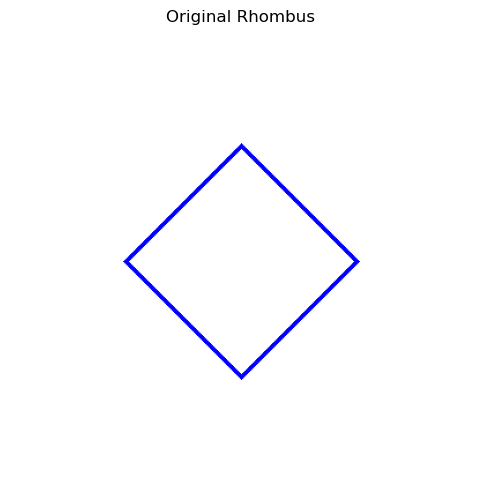

In [78]:
import cv2
import numpy as np

canvas_size = (400, 400, 3)
img = np.ones(canvas_size, dtype=np.uint8) * 255 
rhombus = np.array([[200, 100], [300, 200], [200, 300], [100, 200]], np.int32)

cv2.polylines(img, [rhombus], isClosed=True, color=(0, 0, 255), thickness=3) 
show_image("Original Rhombus", img)


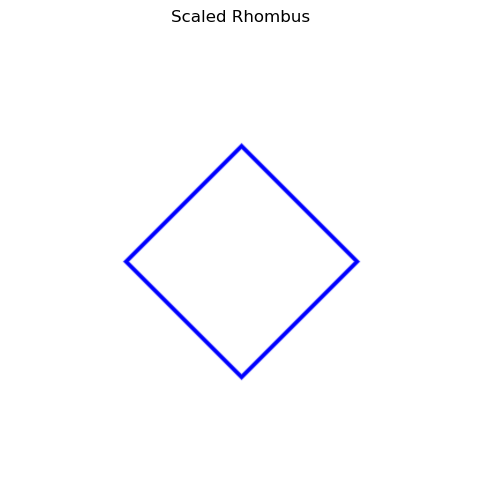

In [118]:
def scale(img, sx, sy):
    rows, cols = img.shape[:2]
    return cv2.resize(img, (int(cols * sx), int(rows * sy)))

scaled_img = scale(img, 15, 15)
show_image("Scaled Rhombus", scaled_img)


In [120]:
print("Original size:", img.shape[:2])
print("Scaled size:", scaled_img.shape[:2])

Original size: (400, 400)
Scaled size: (6000, 6000)


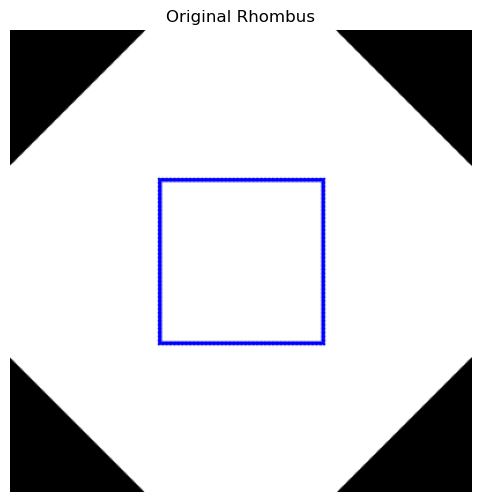

In [82]:
def rotate(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img

rotated_img = rotate(img, 45)

show_image("Original Rhombus", rotated_img)


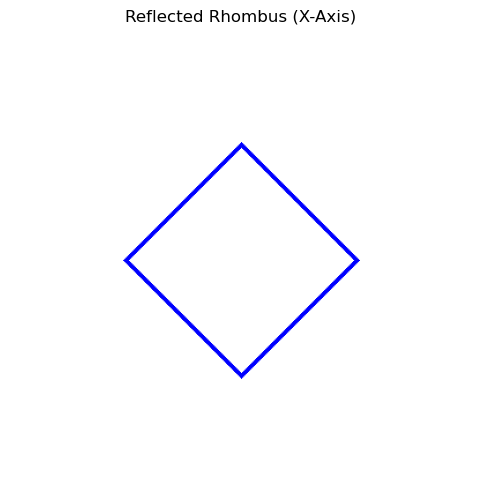

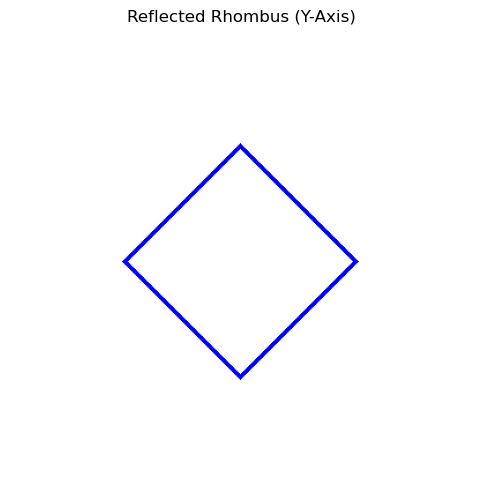

In [84]:
def reflect(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)  
    elif axis == 'y':
        return cv2.flip(img, 1)  
    else:
        raise ValueError("Axis must be 'x' or 'y'")

reflected_x = reflect(img, 'x')

show_image("Reflected Rhombus (X-Axis)", reflected_x)

reflected_y = reflect(img, 'y')
show_image("Reflected Rhombus (Y-Axis)", reflected_y)


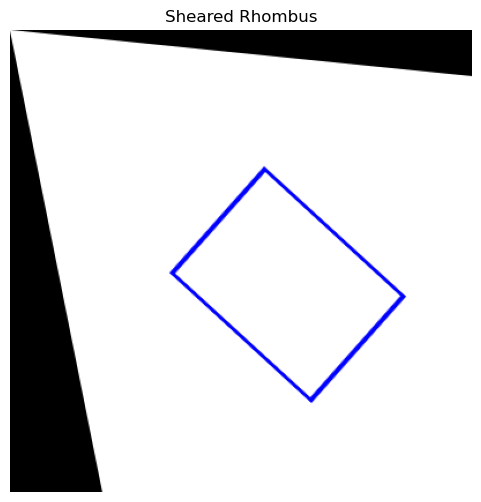

In [86]:
def shear(img, shx, shy):
    rows, cols = img.shape[:2]
    shearing_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    sheared_img = cv2.warpAffine(img, shearing_matrix, (cols, rows))
    return sheared_img

sheared_img = shear(img, 0.2, 0.1)
show_image("Sheared Rhombus", sheared_img)


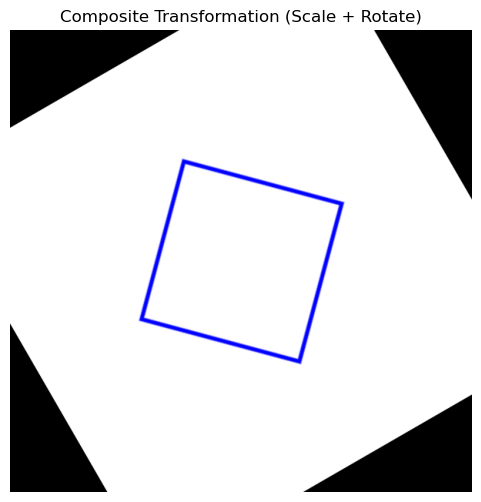

In [88]:
def composite_transform(img, transformations):
    result = img.copy()
    for transform in transformations:
        result = transform(result)
    return result

composite_img = composite_transform(img, [lambda x: scale(x, 1.5, 1.5), lambda x: rotate(x, 30)])
show_image("Composite Transformation (Scale + Rotate)", composite_img)


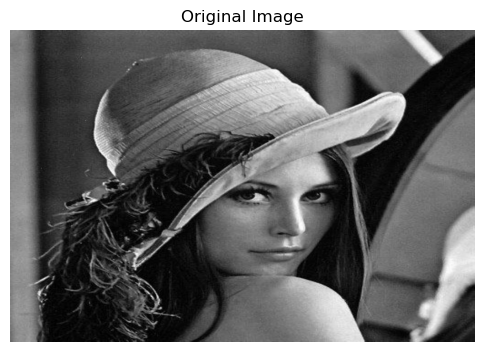

In [89]:
image_path = "C:/Users/ANSHIKA SHARMA/Downloads/cropped_image.png"  
img1 = cv2.imread(image_path)
show_image("Original Image", img1)


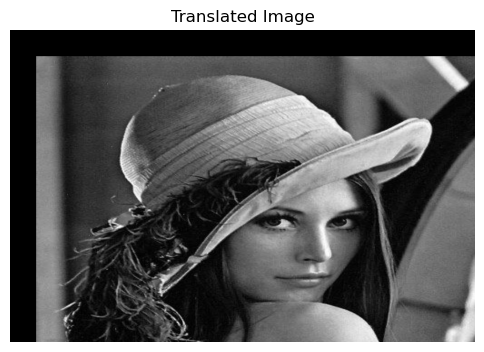

In [91]:
def translate(img1, tx, ty):
    rows, cols = img1.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img1, translation_matrix, (cols, rows))
    return translated_img

translated_img = translate(img1, 50, 50)  
show_image("Translated Image", translated_img)


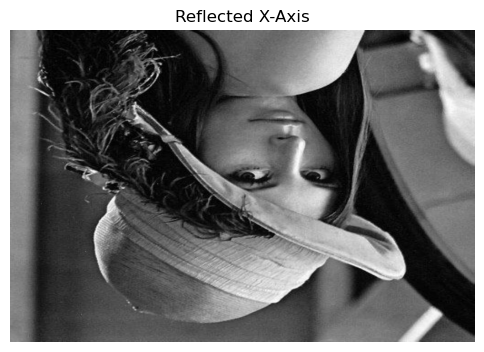

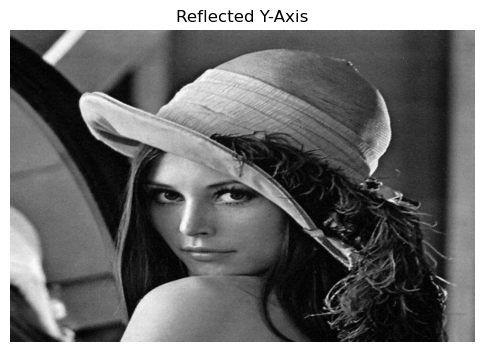

In [93]:
def reflect(img1, axis):
    if axis == 'x':
        return cv2.flip(img1, 0) 
    elif axis == 'y':
        return cv2.flip(img1, 1) 
    else:
        raise ValueError("Axis must be 'x' or 'y'")

reflected_x = reflect(img1, 'x')
reflected_y = reflect(img1, 'y')
show_image("Reflected X-Axis", reflected_x)
show_image("Reflected Y-Axis", reflected_y)


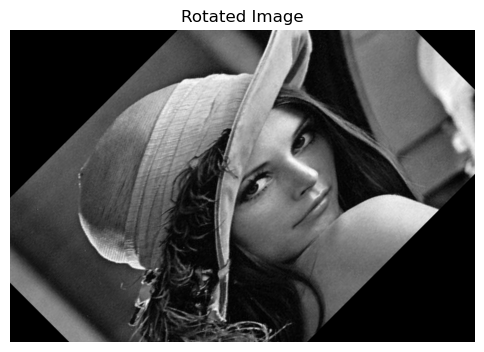

In [95]:
def rotate(img1, angle):
    rows, cols = img1.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img1, rotation_matrix, (cols, rows))
    return rotated_img

rotated_img = rotate(img1, 45)  
show_image("Rotated Image", rotated_img)


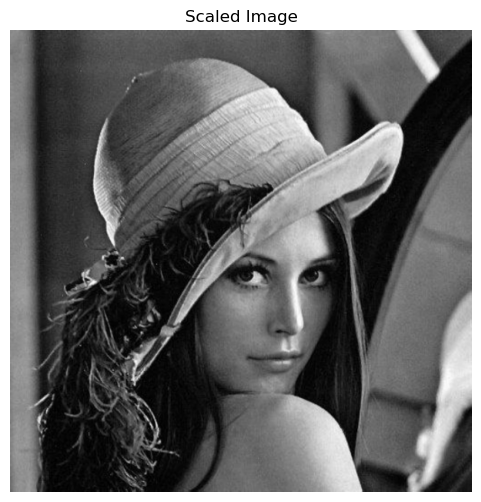

In [112]:
def scale(img1, sx, sy):
    rows, cols = img.shape[:2]
    return cv2.resize(img1, (int(cols * sx), int(rows * sy)))

scaled_img = scale(img1, 1.5, 1.5) 
show_image("Scaled Image", scaled_img)



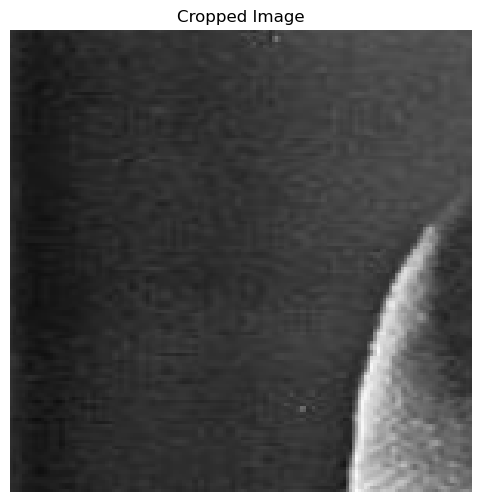

In [99]:
def crop(img1, x1, y1, x2, y2):
    return img1[y1:y2, x1:x2]

cropped_img = crop(img1, 50, 50, 200, 200) 
show_image("Cropped Image", cropped_img)


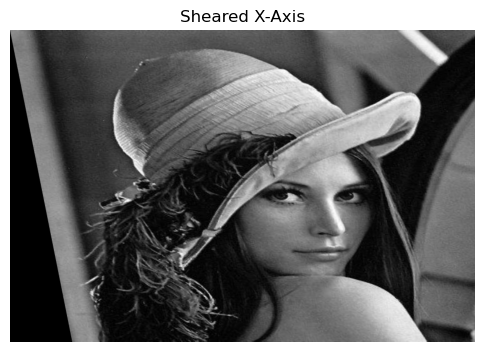

In [102]:
def shear_x(img1, shx):
    rows, cols = img1.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared_img = cv2.warpAffine(img1, shear_matrix, (cols, rows))
    return sheared_img

sheared_x_img = shear_x(img1, 0.2)
show_image("Sheared X-Axis", sheared_x_img)


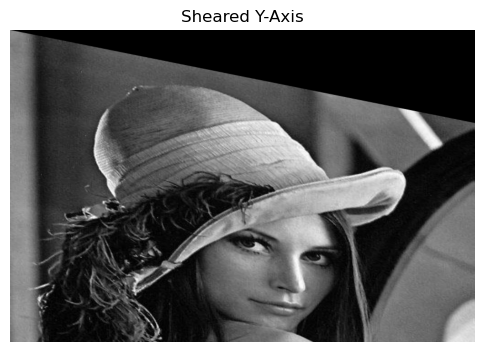

In [104]:
def shear_y(img1, shy):
    rows, cols = img1.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared_img = cv2.warpAffine(img1, shear_matrix, (cols, rows))
    return sheared_img

sheared_y_img = shear_y(img1, 0.2)
show_image("Sheared Y-Axis", sheared_y_img)
